In [1]:
#!wget http://irsa.ipac.caltech.edu/data/Planck/release_2/all-sky-maps/maps/LFI_SkyMap_070_1024_R2.01_full.fits

In [2]:
import healpy as hp

In [3]:
%matplotlib inline

In [4]:
m = hp.read_map("LFI_SkyMap_070_1024_R2.01_full.fits")

NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


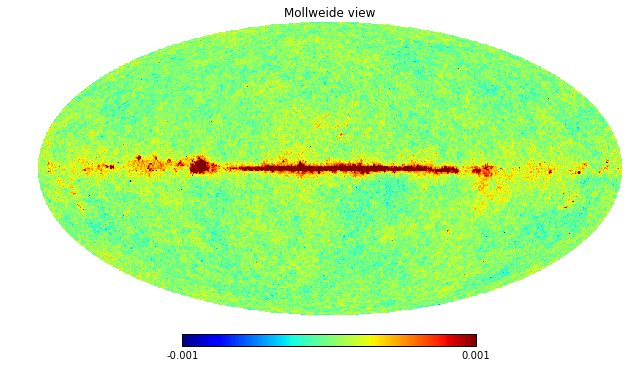

In [5]:
hp.mollview(m, min=-1e-3, max=1e-3)

In [6]:
import matplotlib.pyplot as plt

In [7]:
import dipole

In [8]:
dip = dipole.solar_system_dipole_map(1024)

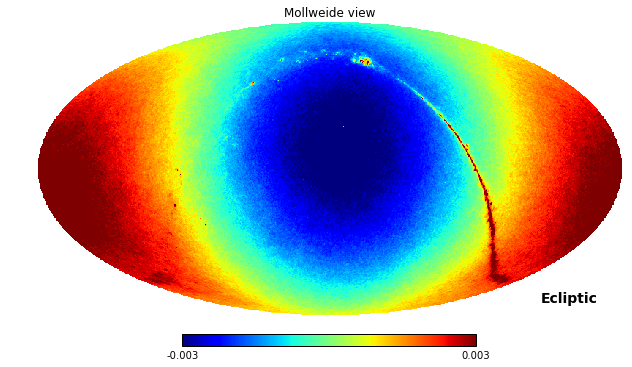

In [37]:
hp.mollview(m+dip, min=-3e-3, max=3e-3, coord="GE")

In [41]:
speed, theta, phi = dipole.wmap5_parameters()

In [43]:
np.degrees([theta, phi])

array([[ 101.14081923],
       [ 171.64873066]])

In [40]:
r = hp.Rotator(coord="GE")

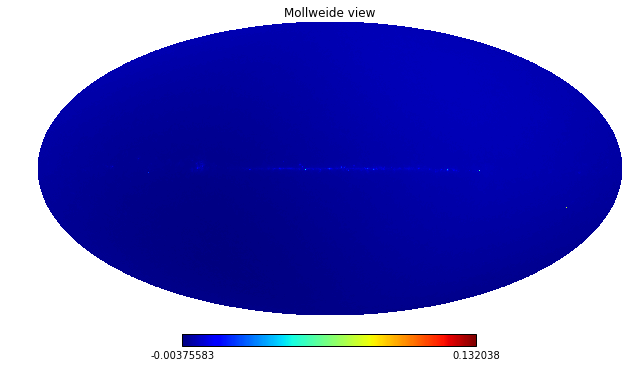

In [10]:
square_map = hp.mollview(m+dip, xsize=3000, return_projected_map=True)

In [11]:
square_map.shape

(1500, 3000)

In [12]:
import numpy as np

In [13]:
np.isfinite(square_map).sum()

3530668

In [14]:
square_map.size

4500000

In [15]:
xsize = 360 
ysize = xsize/2.
nside = 1024

theta = np.linspace(np.pi, 0, ysize)
phi   = np.linspace(-np.pi, np.pi, xsize)
longitude = np.radians(np.linspace(-180, 180, xsize))
latitude = np.radians(np.linspace(-90, 90, ysize))

# project the map to a rectangular matrix xsize x ysize
PHI, THETA = np.meshgrid(phi, theta)
grid_pix = hp.ang2pix(nside, THETA, PHI)


In [16]:
grid_map = (m+dip)[grid_pix]

In [17]:
#longitude = longitude[::-1]

In [27]:
longitude

array([-3.14159265, -3.12409074, -3.10658884, -3.08908693, -3.07158502,
       -3.05408311, -3.0365812 , -3.01907929, -3.00157738, -2.98407547,
       -2.96657356, -2.94907166, -2.93156975, -2.91406784, -2.89656593,
       -2.87906402, -2.86156211, -2.8440602 , -2.82655829, -2.80905638,
       -2.79155447, -2.77405257, -2.75655066, -2.73904875, -2.72154684,
       -2.70404493, -2.68654302, -2.66904111, -2.6515392 , -2.63403729,
       -2.61653539, -2.59903348, -2.58153157, -2.56402966, -2.54652775,
       -2.52902584, -2.51152393, -2.49402202, -2.47652011, -2.45901821,
       -2.4415163 , -2.42401439, -2.40651248, -2.38901057, -2.37150866,
       -2.35400675, -2.33650484, -2.31900293, -2.30150102, -2.28399912,
       -2.26649721, -2.2489953 , -2.23149339, -2.21399148, -2.19648957,
       -2.17898766, -2.16148575, -2.14398384, -2.12648194, -2.10898003,
       -2.09147812, -2.07397621, -2.0564743 , -2.03897239, -2.02147048,
       -2.00396857, -1.98646666, -1.96896476, -1.95146285, -1.93

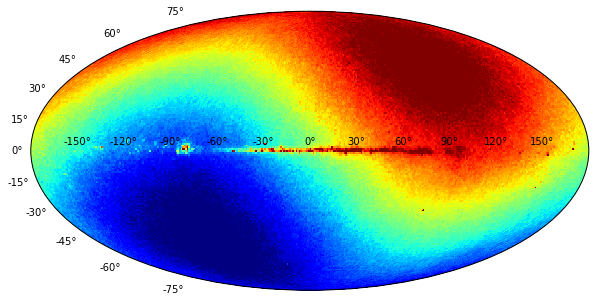

In [18]:
fig = plt.figure(figsize=(10,20))

fig.add_subplot(111, projection="mollweide")
vmax=3e-3
vmin = -3e-3
plt.pcolormesh(longitude[::-1], latitude, grid_map,vmin=vmin, vmax=vmax,  )

In [30]:
grid_map[:3,:2]

array([[-0.00244547, -0.00244547],
       [-0.00272277, -0.00262748],
       [-0.00269324, -0.00269539]])

In [19]:
grid_map.max()

0.022780247026142675

In [20]:
grid_map.min()

-0.003676650131335002

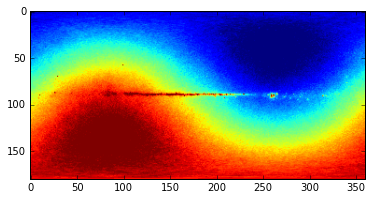

In [21]:
plt.imshow(grid_map, vmin=-3e-3, vmax=3e-3)

In [22]:
import pandas as pd

In [23]:
flat=grid_map.flatten()

In [24]:
flat

array([-0.00244547, -0.00244547, -0.00244547, ...,  0.00253465,
        0.00253465,  0.00247378])

In [25]:
long_lat_index = pd.MultiIndex.from_product(
    [np.degrees(a).round().astype(np.int) for a in [latitude, longitude]], names=["latitude","longitude"])

In [ ]:
map_series = pd.Series(flat, index=long_lat_index)

In [ ]:
map_series.head()

In [ ]:
square = map_series.unstack().values

In [ ]:
square.shape

In [ ]:
grid_map.shape

In [ ]:
plt.imshow(grid_map, vmin=-3e-3, vmax=3e-3)

In [ ]:
plt.imshow(square, vmin=-3e-3, vmax=3e-3)

In [ ]:
map_series.name = "temperature"

In [ ]:
map_series.to_hdf("planck_70GHz_map.hdf5", "temperature")

In [31]:
hp.mollview?

In [36]:
hp.vec2dir??